# CHAPTER 6: Entropy and Divergence

### This code  runs simulation for Examples 14, 15 and 16 and generates Figures 1, 2, 3, 4 and 5 from Chapter 6: Entropy and Divergence (vol I)
TEXT: A. H. Sayed, INFERENCE AND LEARNING FROM DATA, Cambridge University Press, 2022.

<div style="text-align: justify">
DISCLAIMER:  This computer code is  provided  "as is"   without  any  guarantees.
Practitioners  should  use it  at their own risk.  While  the  codes in  the text 
are useful for instructional purposes, they are not intended to serve as examples 
of full-blown or optimized designs. The author has made no attempt at optimizing 
the codes, perfecting them, or even checking them for absolute accuracy. In order 
to keep the codes at a level  that is  easy to follow by students, the author has 
often chosen to  sacrifice  performance or even programming elegance in  lieu  of 
simplicity. Students can use the computer codes to run variations of the examples 
shown in the text. 
</div>

The Jupyter notebook and python codes are developed by Semanur Avşar 

Required Libraries:

1. numpy
2. matplotlib

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Figure 6.1 (Boolean Random Variable)

Consider a Boolean (or Bernoulli) random variable $\mathcal{x}$ where $\mathcal{x}$ is either 0 or 1. Then, expression ($6.6$) reduces to:

$$
\textit{H}(\mathcal{x}) = -\mathbb{P}(\mathcal{x}=0) \log_{2} \mathbb{P}(\mathcal{x}=0) - \mathbb{P}(\mathcal{x}=1) \log_{2} \mathbb{P}(\mathcal{x}=1) \tag{6.8}
$$


or, more compactly, if we let $p=\mathbb{P}(\mathcal{x} =1)$:

$$
H(\mathcal{x}) = -p \log_{2} p - (1-p) \log_{2}(1-p),\;\;\;p\in[0,1] \tag{6.9}
$$

In this case, the entropy measure is a function of $p$ alone and it is customary to denote it by $H(p)$.

The entropy of a random variable reveals how much uncertainty there is about the variable. For example, if it happens that $p=1$, then the event $\mathcal{x}=1$ occurs with probability 1, and we would expect to observe it each time a random experiment is performed on $\mathcal{x}$. Therefore, this situation corresponds to a case of least uncertainty about $\mathcal{x}$, and the corresponding entropy will be $H(\mathcal{x})=0$, where we use the convention $0\log_{2} 0 =0$ since:

$$
\lim_{p\rightarrow 0^{+}} p\log_2 p = 0 \tag{6.10}
$$


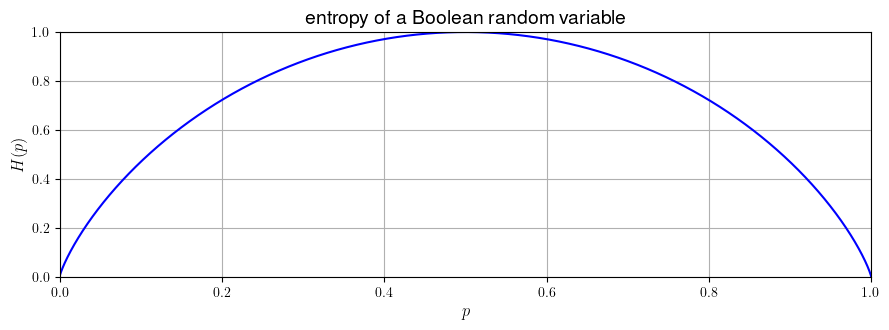

In [14]:
n = 1
H = []

for p in np.arange(0.000001, 1.0, 0.000001):
    entropy = -p * np.log2(p) - (1 - p) * np.log2(1 - p)
    H.append(entropy)
    n += 1

# Plotting the results

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

plt.rcParams['figure.figsize']=9,6
plt.figure()

# figure 1 (entropy)
plt.subplot(211)
plt.plot(np.arange(0.000001, 1.0, 0.000001), H, 'b')
plt.xlabel('$p$', fontsize=12)
plt.ylabel('$H(p)$', fontsize=12)
plt.ylim([0, 1])
plt.xlim([0, 1])
plt.title('entropy of a Boolean random variable', fontsize=14)
plt.grid()
plt.tight_layout()

plt.show()

**Figure 6.1** Plot of the entropy function ($6.9$) for a Boolean random variable as a function of $p\in[0,1]$.

A similar situation occurs when $p=0$; in this case, we would expect to observe the event $\mathcal{x}=0$ each time a random experiment is performed on $\mathcal{x}$.  This case again corresponds to a situation of least uncertainty about $\mathcal{x}$ and the corresponding entropy is also $H(\mathcal{x})=0$. The case of most uncertainty about $\mathcal{x}$ occurs when $p=1/2$. In this case, the events $\mathcal{x}=1$ and $\mathcal{x}=0$ are equally likely and the entropy evaluates to $H(\mathcal{x})=1$.  Figure$~6.1$ plots $H(p)$ versus $p$; it is seen that the function is concave, attains the value $0$ at the locations $p=0,1$, and attains the maximum value of 1 at $p=1/2$.

## Example 6.14 (Change of coordinates)


If the coordinate system is modified and the parameter $\theta$ for the objective function is replaced by a transformed parameter vector $\theta'$ in the new space, then it is understandable that the gradient vector of the same objective function $J(\cdot)$ relative to $\theta'$ will generally point in a different search direction than the gradient vector relative to $\theta$.
 
Let $\theta=col\{x,y\} \in \mathbb{R}^{2}$ and consider a cost function of the form:

$$
J(\theta) = x^2 + (y-1)^2 \Longrightarrow \nabla_{\theta} J(\theta) = \begin{bmatrix} \partial J / \partial x & \partial J / \partial y \end{bmatrix} = \begin{bmatrix} 2x & 2(y-1) \end{bmatrix} \tag{6.122}
$$

Observe that $J(x,y)$ is quadratic over $\theta$. Applying the Newton recursion ($6.111$) to $J(x,y)$ would lead to its minimizer $(x^o,y^o) = [0\;1]^T$ in a single step.


 
 
Now assume we perform a change of variables to polar coordinates and let $x=r\cos\phi$ and $y=r\sin\phi$, where $\phi\in[-\pi,\pi]$. Define the new parameter vector $\theta'= col\{r, \phi \}$. Then, the same cost function can be written as

$$
J(\theta')=r^2+1-2r\sin\phi \Longrightarrow \nabla_{\theta'} J(\theta')=\begin{pmatrix}\frac{\partial J}{\partial r} & \frac{\partial J}{\partial \phi}\end{pmatrix}=\begin{pmatrix}2(r-\sin\phi) & -2r\cos\phi\end{pmatrix} \tag{6.123}
$$

The transformed cost function is not quadratic over $\theta'$, and applying Newton recursion ($6.111$) to $J(\theta')$ will not converge in a single step anymore; it may not even converge.

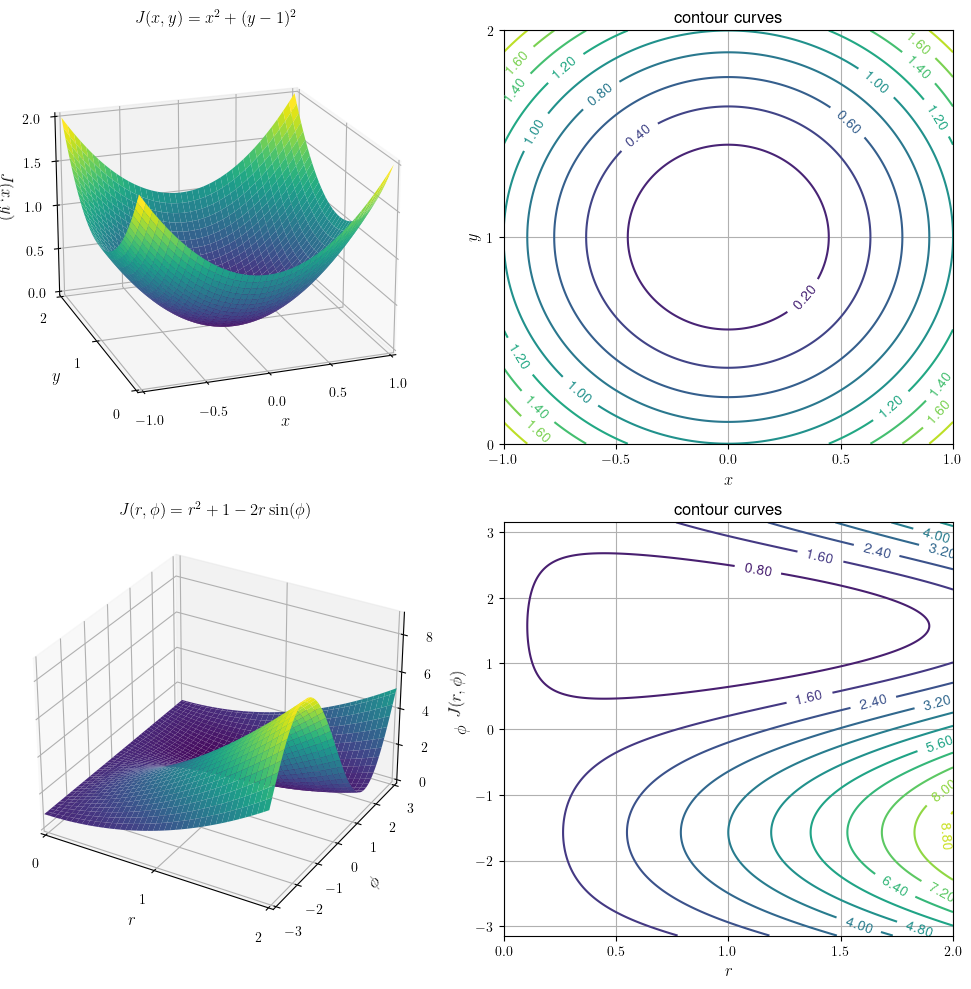

In [15]:
# quadratic function g(z)
# J(x,y) = x^2 + (y-1)^2
# G(r,phi) = r^2 + 1-2*r*sin(phi)

# Generating data for g(z) in polar coordinates
ra, rb, dr = 0, 2, 0.01
phia, phib, dphi = -np.pi, np.pi, 0.01

r_values = np.arange(ra, rb + dr, dr)
phi_values = np.arange(phia, phib + dphi, dphi)
g = np.zeros((len(r_values), len(phi_values)))

for i, r in enumerate(r_values):
    for j, phi in enumerate(phi_values):
        g[i, j] = r**2 + 1 - 2*r*np.sin(phi)

# Generating data for f(x, y) in Cartesian coordinates
xa, xb, dx = -1, 1, 0.01
ya, yb, dy = 0, 2, 0.01

x_values = np.arange(xa, xb + dx, dx)
y_values = np.arange(ya, yb + dy, dy)
f = np.zeros((len(x_values), len(y_values)))

for i, x in enumerate(x_values):
    for j, y in enumerate(y_values):
        f[i, j] = x**2 + (y-1)**2
        
# Plotting figure 2 (objective function and contour curves in Cartesian and polar coordinates)

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

plt.figure(figsize=(10, 10))

# subplot-1
ax1 = plt.subplot(221, projection='3d')
X, Y = np.meshgrid(x_values, y_values)
ax1.plot_surface(X, Y, f.T, cmap='viridis', edgecolor='none') # surface with contour plot under it
ax1.set_xlabel('$x$', fontsize=12)
ax1.set_ylabel('$y$', fontsize=12)
ax1.set_xlim([-1,1])
ax1.set_ylim([0,2])
ax1.view_init(elev=20, azim=-110) # change the axis orientation to fit the figure in the book
ax1.set_zlabel('$J(x,y)$', fontsize=12, rotation=170)
ax1.set_title('$J(x,y)=x^2+(y-1)^2$', fontsize=12)
ax1.set_zticks(np.arange(0,2.5,0.5))
ax1.set_xticks(np.arange(-1,1.5,0.5))
ax1.set_yticks(np.arange(0,3,1))


# subplot-2 (Contour plot with custom labels)
plt.subplot(222)
contour_levels = 12
contour_plot = plt.contour(x_values, y_values, f.T, levels=contour_levels, cmap='viridis')
plt.clabel(contour_plot, fontsize=10, inline=1, fmt='%1.2f')
plt.xticks(np.arange(-1,1.5,0.5))
plt.yticks(np.arange(0,3,1))
plt.xlabel('$x$', fontsize=12)
plt.ylabel('$y$', fontsize=12)
plt.title('contour curves', fontsize=12)
plt.grid(True)


#subplot-3
ax3 = plt.subplot(223, projection='3d')
R, PHI = np.meshgrid(r_values, phi_values)
ax3.plot_surface(R, PHI, g.T, cmap='viridis', edgecolor='none') # surface with contour plot under it
ax3.set_xlabel('$r$', fontsize=12)
ax3.set_ylabel('$\phi$', fontsize=12)
ax3.set_xlim([0,2])
ax3.set_ylim([-3,3])
ax3.set_zlabel('$J(r,\phi)$', fontsize=12)
ax3.set_title('$J(r,\phi)=r^2+1-2r\sin(\phi)$', fontsize=12)
ax3.set_zticks(np.arange(0,9,2))
ax3.set_yticks(np.arange(-3,4,1))
ax3.set_xticks(np.arange(0,3,1))

# subplot-4 (Contour plot with custom labels)
plt.subplot(224)
contour_levels = 12
contour_plot = plt.contour(r_values, phi_values, g.T, levels=contour_levels, cmap='viridis')
plt.clabel(contour_plot, fontsize=10, inline=1, fmt='%1.2f')
plt.xticks(np.arange(0,2.5,0.5))
plt.yticks(np.arange(-3,4,1))
plt.xlabel('$r$', fontsize=12)
plt.ylabel('$\phi$', fontsize=12)
plt.title('contour curves', fontsize=12)
plt.grid(True)

plt.tight_layout()
plt.show()

**Figure 6.2** The plots in the top row show the objective function $J(\theta)=x^2+(y-1)^2$ in Cartesian coordinates and its contour curves. The plots in the bottom row show the same objective function in polar coordinates and its contour curves. 

Figure 6.2  plots the objective function in Cartesian and polar spaces, along with their contour curves. It is evident that a change in the coordinate system leads to a change in the behavior of the objective function. In particular, we can compare the gradient vectors at location $(x,y)=(1,1)$, which corresponds to $(r,\phi)=(\sqrt{2},{\pi\over 4})$, for both representations to find

$$
\nabla_{\theta} {J }(\theta)\Bigr|_{(x,y)=(1,1)}=\begin{bmatrix}2&0\end{bmatrix} \tag{6.124a}
$$

$$
\nabla_{\theta'} {J}(\theta')\Bigr|_{(r,\phi)=(\sqrt{2},{\pi\over 4})}=\begin{bmatrix}\sqrt{2}&-2\end{bmatrix} \tag{6.124b}
$$

Observe how the gradient vectors point in different directions and also have different norms.

The Hessian matrix of $J(\theta')$ is given by

$$
\nabla_{\theta'}^2 J(\theta')=\begin{pmatrix}2&-2\cos\phi\\-2\cos\phi&2r\sin\phi\end{pmatrix} \tag{6.125}
$$

so that if we were to apply Newton recursion ($6.111$) to it we get, after simplifications,

$$
\begin{pmatrix}r_m\\ \phi_m\end{pmatrix}=\begin{pmatrix}r_{m-1}\\\phi_{m-1}\end{pmatrix}-\frac{\mu}{4r_{m-1}\sin\phi_{m-1}-4\cos^2(\phi_{m-1})}\begin{pmatrix}4r_{m-1}(r_{m-1}\sin\phi_{m-1}-1)\\-2\sin(2\phi_{m-1})\end{pmatrix} \tag{6.126}
$$

The initial conditions for the parameters $(r,\phi)$ need to be chosen close enough to the minimizer, which we know occurs at $(r^o,\phi^o)=(1,\pi/2)$. We run the recursion with $\mu=0.01$, $M=500$ iterations, and consider two different sets of initial conditions $(r_{-1},\phi_{-1})=(0.9,1.4)$ and $(r_{-1},\phi_{-1})=(0.2,0.5)$. The first choice is close to the minimizer, while the second choice is away from it. We observe from the plots in Figure$~6.3$ that convergence occurs in one case but not the other.


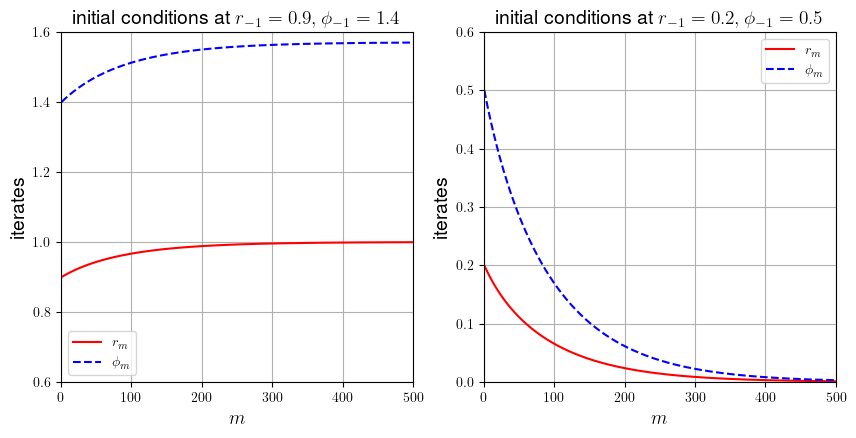

In [16]:
## Newton recursion in polar coordinates
M = 500
r = np.zeros(M)
phi = np.zeros(M)
r[0] = 0.9 # one set of initial conditions
phi[0] = 1.4
mu = 0.01
m = 1

for m in range(1,M) :
   a = 4*r[m-1]*r[m-1]*np.sin(phi[m-1]) - 4*r[m-1]
   b = -2*np.sin(2*phi[m-1])
   d = 4*r[m-1]*np.sin(phi[m-1])-4*np.cos(phi[m-1])*np.cos(phi[m-1])
   
   r[m]= r[m-1] - mu*a/d
   phi[m] = phi[m-1] - mu*b/d
    
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

plt.figure(figsize=(10, 10))

plt.subplot(221)
plt.plot(range(1, M+1), r, 'r', label='$r_m$')
plt.plot(range(1, M+1), phi, '--b', label='$\phi_m$')
plt.xlabel('$m$', fontsize=14)
plt.ylabel('iterates', fontsize=14)
normal_text = "initial conditions at"
latex_expression = r'$r_{-1}=0.9, \phi_{-1}=1.4$'
title_text = normal_text + " " + latex_expression
plt.title(title_text, fontsize=14)
plt.xticks(np.arange(0, 600, 100))
plt.yticks(np.arange(0.6, 1.7, 0.2))
plt.xlim([0,500])
plt.ylim([0.6,1.6])
plt.grid()
plt.legend()

r[0] = 0.2 # a second set of initial conditions
phi[0] = 0.5
m = 1

for m in range(1,M) :
   a = 4*r[m-1]*r[m-1]*np.sin(phi[m-1]) - 4*r[m-1]
   b = -2*np.sin(2*phi[m-1])
   d = 4*r[m-1]*np.sin(phi[m-1])-4*np.cos(phi[m-1])*np.cos(phi[m-1])
   
   r[m]= r[m-1] - mu*a/d
   phi[m] = phi[m-1] - mu*b/d
    

plt.subplot(222)
plt.plot(range(1, M+1), r, 'r', label='$r_m$')
plt.plot(range(1, M+1), phi, '--b', label='$\phi_m$')
plt.xlabel('$m$', fontsize=14)
plt.ylabel('iterates', fontsize=14)
normal_text = "initial conditions at"
latex_expression = r'$r_{-1}=0.2, \phi_{-1}=0.5$'
title_text = normal_text + " " + latex_expression
plt.title(title_text, fontsize=14)
plt.xticks(np.arange(0, 600, 100))
plt.yticks(np.arange(0, 0.7, 0.1))
plt.xlim([0,500])
plt.ylim([0,0.6])
plt.grid()
plt.legend()
plt.show()

**Figure 6.3** Evolution of the iterates $(r_m,\phi_m)$ for Newton recursion ($6.126$) for two different choices of the initial conditions. The plots on the left converge to the location of the global minimizer at $(r^o,\phi^o)=(1,\pi/2)$

## Example 6.15 (Fitting Gaussian distributions)
 
Consider again a collection of $N$ iid  Gaussian random variables with $\mathcal{x_n}\sim {\cal N}_{\mathcal{x_n}}(\mu,\sigma^2)$. We assume in this example that both $(\mu,\sigma^2)$ are unknown and let the Gaussian distribution be parameterized by $\theta=\textnormal{col}\{\mu,\sigma^2\}$. We estimate these parameters by maximizing the log-likelihood function of the observations, which according to ($6.102$) is defined as the log of the joint pdf of the observations, namely, 

$$
\theta^{o}=\underset{\theta\in\mathbb{R}^2}{\text{argmin}}\, \ell(\theta) \tag{6.132}
$$

where 

$$
\ell(\theta) = \ell(\mu, \sigma^2) \triangleq -\ln\left\{ p_{\mathbf{x}_1,\mathbf{x}_2,\ldots,\mathbf{x}_N}(x_1,x_2,\ldots,x_N;\theta)\right\} \\ = \frac{N}{2}\ln(2\pi\sigma^2) + \frac{1}{2\sigma^2}\sum_{n=1}^N (x_n-\mu)^2 \tag{6.133}
$$


We will explain in Chapter$~31$ that problems of this type arise in the context of  maximum-likelihood estimation.
 
It is straightforward to verify for this example that:

$$
\nabla_{\theta} \ell(\theta) = \begin{bmatrix}
-\frac{1}{\sigma^2} \sum_{n=1}^N (x_n-\mu) \\
\frac{N}{2\sigma^2}-\frac{1}{2\sigma^4} \sum_{n=1}^N (x_n-\mu)^2
\end{bmatrix}  \tag{6.134}
$$

$$
\nabla_{\theta}^2 \ell(\theta) = \begin{bmatrix}
\frac{N}{\sigma^2} & \frac{1}{\sigma^4} \sum_{n=1}^N (x_n-\mu) \\
\frac{1}{\sigma^4} \sum_{n=1}^N (x_n-\mu) & -\frac{N}{2\sigma^4}+\frac{1}{\sigma^6} \sum_{n=1}^N (x_n-\mu)^2
\end{bmatrix} \tag{6.135}
$$

where $F(\theta)$ is defined as:

$$
F(\theta) = \mathbb{E}_{p}[\nabla_{\theta}^2 \ell(\theta)] = \begin{bmatrix}
\frac{N}{\sigma^2} & 0 \\
0 & \frac{N}{2\sigma^4}
\end{bmatrix} \tag{6.136}
$$

Observe how the Hessian matrix is data-dependent; its entries depend on the samples $\{x_n\}$, while the entries of the Fisher information matrix are data-independent due to the averaging operation. Obviously, by ergodicity, and for $N$ large enough, the Hessian matrix $\nabla_{\theta}^2 \ell(\theta)$ tends to $F(\theta)$.


We can set the gradient vector of $\ell(\theta)$ to zero at the solution $(\widehat{\mu},\widehat{\sigma}^2)$ to obtain

$$
\widehat{\mu} = \frac{1}{N}\sum_{n=1}^N x_n, \quad \widehat{\sigma}^2 = \frac{1}{N}\sum_{n=1}^N (x_n-\widehat{\mu})^2 \tag{6.137}
$$

However, it can be verified that this estimator for $\sigma^2$ is biased, meaning that its mean does not coincide with the true parameter $\sigma^2$ (see Prob.$~31.1$), namely,

$$
\mathbb{E}[\widehat{\sigma}^2] = \frac{N-1}{N}\sigma^2 \tag{6.138}
$$

Therefore, it is customary to employ the following alternative expression for estimating the variance of the Gaussian distribution from sample realizations:

$$
\widehat{\sigma}^2 = \frac{1}{N-1}\sum_{n=1}^N (x_n-\widehat{\mu})^2 \tag{6.139}
$$

where we are now dividing by $N-1$. We generate $N=400$ random realizations $\{x_n\}$ from a Gaussian distribution with its mean chosen randomly at $\mu=1.3724$ and with variance set to $\sigma^2=4$. We used the above expressions to estimate the mean and variance leading to

$$
\widehat{\mu} = 1.4406, \quad \widehat{\sigma}^2 = 3.8953 \tag{6.140}
$$


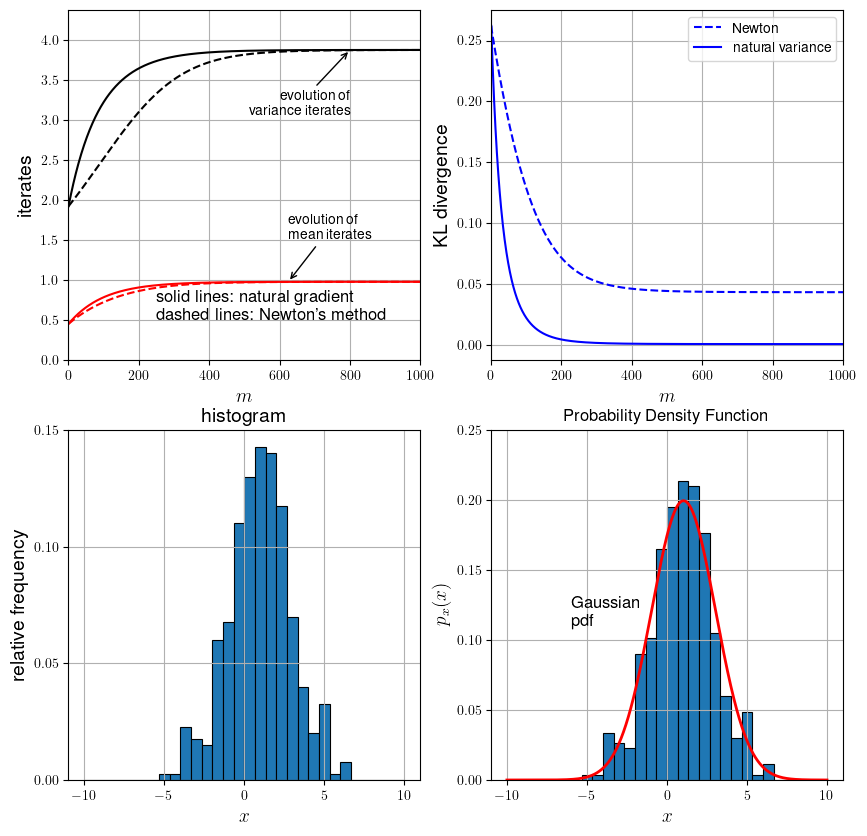

w_newton[:, M]: [0.97753133 3.87568018] 
w_natural[:, M]: [0.97755499 3.87600823]
mu: 1.0323159919126674
hat_mean: 0.9775779498004398
sigma2: 4
hat_var: 3.876081237057164


In [24]:
mu  = 2*np.random.rand() # mean
sigma2 = 4 # variance
N = 400 # number of samples
epsilon=1e-6

x = np.sqrt(sigma2)*np.random.randn(N,1)
x = x+mu

M = 1000 # number of iterations
step = 0.01 # step size

mu_newton   = np.zeros((M,1))
var_newton  = np.zeros((M,1))
mu_natural  = np.zeros((M,1))
var_natural = np.zeros((M,1))
w_newton = np.zeros((2,M))
w_natural = np.zeros((2,M))
KL_newton = np.zeros(M)
KL_natural = np.zeros(M)

mu_newton[0]  = np.random.rand() # initial conditions
var_newton[0] = np.random.rand() + 1
w_newton[:,0] = np.array([mu_newton[0], var_newton[0]])[:,0]

mu_natural[0]  = mu_newton[0]
var_natural[0] = var_newton[0]
w_natural[:,0] = np.array([mu_natural[0], var_natural[0]])[:,0]


term = np.log(var_newton[0]/sigma2) - 1 + (sigma2/var_newton[0]) + ((mu-mu_newton[0])**2/var_newton[0])
KL_newton[0] = 0.5*term

term = np.log(var_natural[0]/sigma2) - 1 + (sigma2/var_natural[0]) + ((mu-mu_natural[0])**2/var_natural[0])
KL_natural[0] = 0.5*term

for m in range(1,M) :
    xc = x - mu_newton[m-1]
    a = ( -np.sum(xc)/var_newton[m-1] )[0]
    yc = xc**2
    b = ( (N/(2*var_newton[m-1]))-(1/(2*var_newton[m-1]*var_newton[m-1]))*np.sum(yc) )[0]
    g_newton = np.array([[a], [b]])
    
    aH = ( N/var_newton[m-1] )[0]
    bH = ( (1/(var_newton[m-1]*var_newton[m-1]))*np.sum(xc) )[0]
    cH = ( (-N/(2*var_newton[m-1]*var_newton[m-1]))+(1/(var_newton[m-1]*var_newton[m-1]*var_newton[m-1]))*np.sum(yc) )[0]
    H = np.array([[aH, bH],[bH, cH]]) # Hessian for Newton
   
    xcn =  x - mu_natural[m-1] 
    an = ( -np.sum(xcn)/var_natural[m-1] )[0]
    ycn = xcn**2
    bn = ( (N/(2*var_natural[m-1]))-(1/(2*var_natural[m-1]*var_natural[m-1]))*np.sum(ycn) )[0]
    g_natural = np.array([[an],[bn]]) # gradient for Newton
    
    F = np.array([[ (N / var_natural[m - 1])[0] , 0], [0, (N / (2 * var_natural[m - 1] * var_natural[m - 1]))[0] ]]) # Fisher
   
    w_newton[:,m]  = w_newton[:,m-1] - (step* np.linalg.inv(epsilon+H) @ g_newton)[:,0]
    w_natural[:,m]  = w_natural[:,m-1]  - (step* np.linalg.inv(epsilon+F) @ g_natural)[:,0]
    
    mu_newton[m]   = w_newton[0,m]
    var_newton[m]  = w_newton[1,m]
    mu_natural[m]  = w_natural[0,m]
    var_natural[m] = w_natural[1,m]
   
    term = np.log(var_newton[m] /sigma2) - 1 + (sigma2/var_newton[m] ) + ((mu-mu_newton[1])**2/var_newton[m])
    KL_newton[m] = 0.5*term;

    term = np.log(var_natural[m]/sigma2) - 1 + (sigma2/var_natural[m]) + ((mu-mu_natural[m])**2/var_natural[m])
    KL_natural[m] = 0.5*term
   

## figure 4 (estimating mean and variance of a Gaussian distribution)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

plt.figure(figsize=(10, 10))

plt.subplot(221)
plt.plot(range(1,M+1),w_newton[0,:],'r--', label='Newton mean')
plt.plot(range(1, M+1), w_newton[1,:], 'k--', label='Newton variance')
plt.xlabel('$m$', fontsize=14)
plt.ylabel('iterates', fontsize=14)
plt.plot(range(1,M+1),w_natural[0,:],'r', label='natural mean')
plt.plot(range(1, M+1), w_natural[1,:], 'k', label='natural variance')
plt.xlim([0, 1000])
plt.ylim([0, np.max(w_newton)+0.5])
plt.annotate('evolution of \n variance iterates', xy= (800, np.max(w_newton)), xytext= (800,np.max(w_newton)-0.5), 
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3"), fontweight='bold',ha='right', va='top')
plt.annotate('evolution of \n mean iterates', xy= (625, np.max(w_natural[0,:])), xytext= (625, np.max(w_natural[0,:])+0.5), 
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3"), fontweight='bold',ha='left', va='bottom')
plt.text(250, 0.5,  'solid lines: natural gradient \n dashed lines: Newton\'s method', fontsize=12)

plt.grid()


plt.subplot(222)
plt.plot(range(1,M+1),KL_newton,'b--', label='Newton')
plt.plot(range(1, M+1), KL_natural, 'b', label='natural variance')
plt.xlabel('$m$', fontsize=14)
plt.ylabel('KL divergence', fontsize=14)
plt.xlim([0, 1000])
plt.grid()
plt.legend()

# (data histograms with and without normalization)
T=10
i=0
t_values = np.arange(-T, T, step)
p = np.zeros(int((T+T)/step))
for t in t_values :
  p[i] = (1/(np.sqrt(2*np.pi*sigma2)))
  p[i] = p[i]*np.exp((-1/(2*sigma2))*(t-mu)**2)
  i=i+1

plt.subplot(223)
weights = np.ones_like(x)/float(len(x))
plt.hist(x, weights= weights, bins=30, range=(-T, T), edgecolor='black', linewidth=0.8) # scale the histogram so that the bars sum up to 1
plt.xlabel('$x$', fontsize=14)
plt.ylabel('relative frequency', fontsize=14)
plt.title('histogram', fontsize=14)
plt.xticks(np.arange(-10,11,5))
plt.yticks(np.arange(0,0.16,0.05))
plt.grid()

plt.subplot(224)
plt.hist(x, bins=30, range=(-T, T), density=True, edgecolor='black', linewidth=0.8) # plot the normalized histogram
plt.plot(t_values, p, 'r', linewidth = 2)
plt.xlabel('$x$', fontsize=14)
plt.ylabel(r'$p_{x}(x)$', fontsize=14)
plt.title('Probability Density Function', fontsize=12)
plt.xticks(np.arange(-10,11,5))
plt.yticks(np.arange(0,0.26,0.05))
plt.grid()
plt.text(-6, 0.11, 'Gaussian \n pdf', fontsize=12)

plt.show()

hat_mean = np.mean(x)
hat_var = np.var(x)

print("w_newton[:, M]:", w_newton[:, M-1], "\nw_natural[:, M]:", w_natural[:, M-1])

print("mu:", mu)
print("hat_mean:", hat_mean)
print("sigma2:", sigma2)
print("hat_var:", hat_var)

**Figure 6.4** Simulation of Newton and natural gradient recursions ($6.141$)--($6.142$) for estimating the mean and variance of a Gaussian distribution from sample measurements. In this simulation, both algorithms converged close to the true values, with the natural gradient algorithm showing faster convergence. The plots in the bottom row show the normalized and unnormalized  histograms of the samples that were used.

Alternatively, in this example, we can minimize $\ell(\theta)$ iteratively by employing the Newton and the natural gradient recursions. For the problem at hand, these recursions take the form

$$
\begin{bmatrix}
\mu_m \\
\sigma^2_m
\end{bmatrix}
=
\begin{bmatrix}
\mu_{m-1} \\
\sigma^2_{m-1}
\end{bmatrix}
- \mu \left( \nabla_{\theta}^2 \ell(\theta_{m-1}) \right)^{-1} \nabla_{\theta^T} \ell(\theta_{m-1})
 \tag{6.141}
$$

$$
\begin{bmatrix}
\mu_m \\
\sigma^2_m
\end{bmatrix}
=
\begin{bmatrix}
\mu_{m-1} \\
\sigma^2_{m-1}
\end{bmatrix}
- \mu \, F^{-1}(\theta_{m-1}) \nabla_{\theta^T} \ell(\theta_{m-1})
 \tag{6.142}
$$

The recursions are not always guaranteed to converge toward the true parameter values. We compare their performance in Fig.$~6.4$ for a case where good convergence is attained. We employed the same $N=400$ samples along with $\mu=0.01$, and ran $M=1000$ iterations. We added $\epsilon I$ to the Hessian matrix and the Fisher information matrix prior to inversion to avoid singularities, where $\epsilon=1\times 10^{-6}$ is a small number. The recursions converged toward $\widehat{\mu}=1.4405$ (Newton), $\widehat{\mu}=1.4406$ (natural gradient), $\widehat{\sigma}^2=3.8852$ (Newton), and $\widehat{\sigma}^2=3.8855$ (natural gradient). Using expression ($6.66$), with $p$ corresponding to the true pdf with parameters $(\mu,\sigma^2)$ and $q$ corresponding to the estimated pdf with parameters $(\mu_m,\sigma^2_m)$, the figure also plots the evolution of the KL divergence between the true Gaussian pdf and its estimated version using both Newton method and the natural gradient algorithm. It is obvious that the latter leads to smaller KL divergence, as expected by construction.

 


### Remark 6.1 (Unnormalized and normalized histograms)

We refer to the two histograms shown in the bottom row of Fig.$~6.4$. The horizontal axis in both plots is the variable $x$ with values ranging over $[-10,10]$. This interval is divided into $30$ smaller bins in the figure. The vertical axis in the histogram on the left represents the relative frequency of values of $x$ within each bin. For example, if we consider the bin that is centered at $x=5$, its relative frequency is approximately $0.025$, suggesting that $2.5\%$ of the values of $x$ fall into this bin. In the histogram on the right, each relative frequency is normalized by the width of the bin. The result is an approximate pdf representation. This normalization is motivated by the following observation. Consider a generic pdf, $p_{\mathbf{x}}(x)$. If we integrate it over some interval $[x_0,x_0+\Delta x]$, we obtain a measure for the relative frequency of values of $x$ falling into this range:

$$
\int_{x_0}^{x_0+\Delta x}p_{\mathbf{x}}(x)dx = \textnormal{relative frequency within $[x_0,x_0+\Delta x]$} \tag{6.143}
$$

Approximating the area under the integral by $p_{\mathbf{x}}(x_0)\Delta x$, we find that the value of the pdf location $x_0$ is roughly

$$
p_{\mathbf{x}}(x_0) \approx \frac{\textnormal{relative frequency}}{\Delta x} \tag{6.144}
$$

In other words, by dividing relative frequencies by the width of the bins, we obtain an approximation for the pdf of $x$. We used this method to construct the histogram shown on the right from the histogram on the left.

## Example 6.16 (Natural gradients and Riemannian geometry)

When minimizing over distributions, the natural gradient construction (Eq. $6.131$) ends up employing the inverse of the Fisher information matrix, which we know from Eq. ($6.131$) is related to the curvature (inverse Hessian) of the KL divergence of $p_{\mathbf{x}}(x;\theta)$ and $p_{\mathbf{x}}(x;\theta')$ as $\theta' \rightarrow \theta$.

We can motivate similar natural gradient constructions for more generic optimization problems that need not be limited to the space of probability distributions:

$$
\theta^{o} = \underset{\theta \in \mathbb{R}^M}{\textnormal{\rm argmin}\,\,} J(\theta) \tag{6.145}
$$

In problem ($6.127$), we sought the optimal solution $\theta^o$ by requiring the successive pdfs to lie on a surface of constant KL divergence. We can pursue a similar construction for more general surfaces, other than probability measures. This is because natural gradient implementations are well-suited for optimization over what is known as **Riemannian manifolds.** Manifolds are generalizations of the notion of surfaces to higher dimensions. For example, a sphere or a torus are three-dimensional manifolds. Riemannian manifolds are a particular class of manifolds over which the notions of distances, angles, and curvatures can be defined and measured. We do not need to provide a rigorous treatment of Riemannian manifolds here; it is sufficient to motivate the concept informally.

Thus, recall that in Euclidean space we can measure (and define) the distance between two vectors, say, $\{p,p+\delta p\} \in \mathbb{R}^{M}$, by computing their Euclidean distance (or the square of it) defined as:

$$
d^2_{E}(p,p+\delta p) = \sum_{\ell=1}^M\;(\delta p_{\ell})^2 = \|\delta p\|^2 = (\delta p)^{\top} \delta p \tag{6.146}
$$

For example, on the plane, this distance metric leads to the convention that the shortest distance between two points is a straight line. However, on curved surfaces, such as on the surface of a sphere, the shortest distance between two points is instead the shortest **arc** connecting them. Riemannian geometry is the branch of geometry that deals with curved spaces of this nature in higher dimensions. The curve with the smallest length that connects two points on a Riemannian manifold is called a **geodesic**.

We associate a metric tensor (also called a *Riemann tensor*) with every point on a Riemannian manifold; loosely, it is a quantity that allows us to measure distances. For Riemannian surfaces in $\mathbb{R}^{M}$, we denote the metric tensor by $G(q)$ at location $q$; it is an $M \times M$ positive-definite matrix that is dependent on $q$. Using the metric tensor, the (squared) distance between two close points $q$ and $q+\delta q$ on the Riemannian manifold is defined by:

$$
d^{2}_{R}(q,q+\delta q) = \sum_{\ell=1}^M \sum_{n=1}^M \delta q_{\ell} G_{\ell n} \delta q_n = (\delta q)^{\top} G(q) \delta q
 \tag{6.147}
$$

where the $\{G_{\ell n}\}$ denote the entries of the matrix $G(q)$. The natural gradient method for minimizing a cost function $J(\theta)$ over Riemannian geometry replaces the inverse Hessian in the Newton method by the inverse of the curvature matrix, i.e., it uses:

$$
\theta_m = \theta_{m-1} - \mu \Bigl(G(\theta_{m-1})\Bigr)^{-1} \nabla J_{\theta^{\top}}(\theta_{m-1}), \quad m \geq 0 \tag{6.148}
$$

where $\mu > 0$ is a small step-size parameter. This update ensures that the successive iterates travel over the manifold defined by $G(q)$, just like formulation ($6.127$) ensures that the successive iterates travel over the manifold of constant KL values. In particular, over the space of probability distributions, we showed in ($6.97$) that the curvature of the KL measure is given by the Fisher information matrix, which explains its use in ($6.131$).

Returning to Example 6.14, let us evaluate the curvature matrix of the manifold described by $J(r,\phi)$ and shown in the lower plot of Fig.$~6.14$. Consider a point $p=\text{col}\{x,y\}$ in Cartesian coordinates and the corresponding point $q=\text{col}\{r,\phi\}$ in polar coordinates, where $r=x\cos\phi$ and $y=r\sin\phi$. Assume $q$ is perturbed slightly to $q+\delta q$ where $\delta q=\text{col}\{\delta r, \delta \phi\}$. The corresponding point $p$ is perturbed to $p+\delta p$ where 

$$
p = \begin{bmatrix}
r\cos(\phi) \\
r\sin(\phi)
\end{bmatrix}, \quad 
p + \delta p = \begin{bmatrix}
(r+\delta r)\cos(\phi+\delta \phi) \\
(r+\delta r)\sin(\phi+\delta \phi)
\end{bmatrix} \tag{6.149}
$$

Using the approximations 

$$
\cos(\delta\phi) \approx 1, \quad \sin(\delta\phi) \approx \delta \phi \tag{6.150}
$$

and ignoring products involving $\delta r$ and $\delta \phi$, we find

$$
\delta p \approx \begin{bmatrix}
-r\delta\phi\sin(\phi) + \delta r\cos(\phi) \\
r\delta\phi\cos(\phi) + \delta r \sin(\phi)
\end{bmatrix} \tag{6.151}
$$

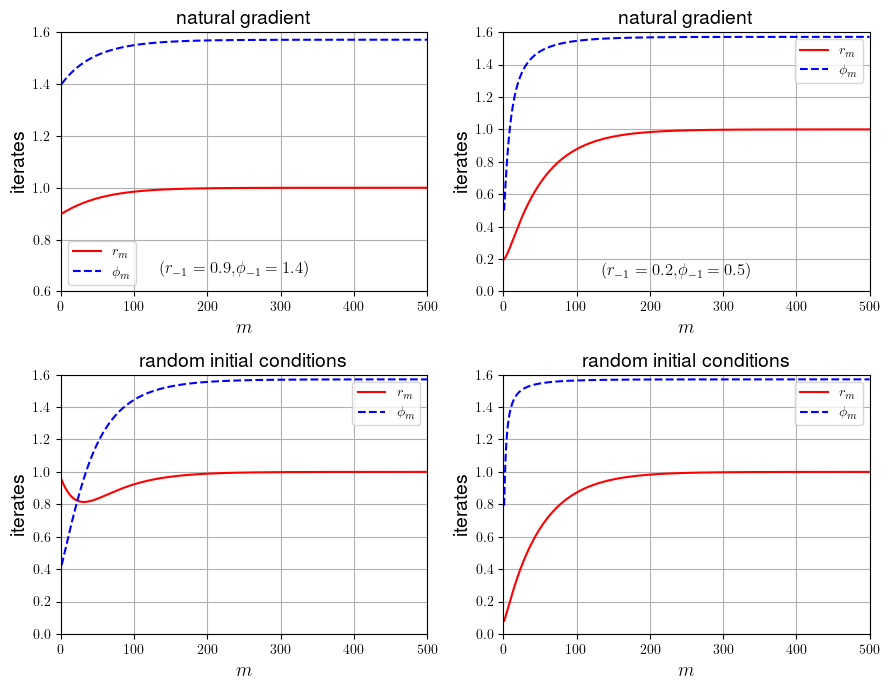

In [29]:
# Natural gradient recursion in polar coordinates
M = 500
m = 1
r = np.zeros(M)
phi = np.zeros(M)
r[0] = 0.9 # one set of initial conditions
phi[0] = 1.4

mu = 0.01

for m in range(1,M) :
   a = 2*(r[m-1]-np.sin(phi[m-1]))
   b = -(2/r[m-1])*np.cos(phi[m-1])
   
   r[m]= r[m-1] - mu*a
   phi[m] = phi[m-1] - mu*b

## figure 5 (natural gradient recursion with different initial conditions)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

plt.figure(figsize=(9, 7))

plt.subplot(221)
plt.plot(range(1, M+1), r, 'r', label='$r_m$')
plt.plot(range(1, M+1), phi, '--b', label='$\phi_m$')
plt.xlabel('$m$', fontsize=14)
plt.ylabel('iterates', fontsize=14)
plt.title("natural gradient", fontsize=14)
plt.xticks(np.arange(0, 600, 100))
plt.yticks(np.arange(0.6, 1.7, 0.2))
plt.xlim([0,500])
plt.ylim([0.6,1.6])
plt.grid()
plt.text(135, 0.67, '$(r_{-1}=0.9$$, $$\phi_{-1}=1.4)$', fontsize=12)
plt.legend()


# a second set of initial conditions
M = 500
m = 1
r = np.zeros(M)
phi = np.zeros(M)
r[0] = 0.2
phi[0] = 0.5

mu = 0.01

for m in range(1,M) :
   a = 2*(r[m-1]-np.sin(phi[m-1]))
   b = -(2/r[m-1])*np.cos(phi[m-1])
   r[m]= r[m-1] - mu*a
   phi[m] = phi[m-1] - mu*b

plt.subplot(222)
plt.plot(range(1, M+1), r, 'r', label='$r_m$')
plt.plot(range(1, M+1), phi, '--b', label='$\phi_m$')
plt.xlabel('$m$', fontsize=14)
plt.ylabel('iterates', fontsize=14)
plt.title("natural gradient", fontsize=14)
plt.xticks(np.arange(0, 600, 100))
plt.yticks(np.arange(0, 1.7, 0.2))
plt.xlim([0,500])
plt.ylim([0,1.6])
plt.grid()
plt.text(135, 0.1, '$(r_{-1}=0.2$$, $$\phi_{-1}=0.5)$', fontsize=12)
plt.legend()


# a fourth set of initial conditions
M = 500
m = 1
r = np.zeros(M)
phi = np.zeros(M)
r[0] = np.random.rand()
phi[0] = np.random.rand()

mu = 0.01

for m in range(1,M) :
   a = 2*(r[m-1]-np.sin(phi[m-1]))
   b = -(2/r[m-1])*np.cos(phi[m-1])
   r[m]= r[m-1] - mu*a
   phi[m] = phi[m-1] - mu*b

plt.subplot(223)
plt.plot(range(1, M+1), r, 'r', label='$r_m$')
plt.plot(range(1, M+1), phi, '--b', label='$\phi_m$')
plt.xlabel('$m$', fontsize=14)
plt.ylabel('iterates', fontsize=14)
plt.title('random initial conditions', fontsize=14)
plt.xticks(np.arange(0, 600, 100))
plt.yticks(np.arange(0, 1.7, 0.2))
plt.xlim([0,500])
plt.ylim([0,1.6])
plt.grid()
plt.legend()

# a third set of initial conditions
M = 500
m = 1
r = np.zeros(M)
phi = np.zeros(M)
r[0] = np.random.rand()
phi[0] = np.random.rand()

mu = 0.01

for m in range(1,M) :
   a = 2*(r[m-1]-np.sin(phi[m-1]))
   b = -(2/r[m-1])*np.cos(phi[m-1])
   r[m]= r[m-1] - mu*a
   phi[m] = phi[m-1] - mu*b

plt.subplot(224)
plt.plot(range(1, M+1), r, 'r', label='$r_m$')
plt.plot(range(1, M+1), phi, '--b', label='$\phi_m$')
plt.xlabel('$m$', fontsize=14)
plt.ylabel('iterates', fontsize=14)
plt.title('random initial conditions', fontsize=14)
plt.xticks(np.arange(0, 600, 100))
plt.yticks(np.arange(0, 1.7, 0.2))
plt.xlim([0,500])
plt.ylim([0,1.6])
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

**Figure 6.5** Evolution of the iterates $(r_m,\phi_m)$ for the natural gradient recursion ($6.156$) for different choices of the initial conditions. The plots converge to the location of the global minimizer at $(r^o,\phi^o)=(1,\pi/2)$

It follows that the Euclidean distance between $p$ and $p+\delta p$ is given by

$$ 
d_{E}^2(p,p+\delta p) \approx r^2(\delta\phi)^2 + (\delta r)^2 \tag{6.152}
$$

We can determine the curvature tensor at location $q$ by imposing a distance invariance requirement:
    
$$
d_{E}^2(p,p+\delta p) = d_{R}^2(q,q+\delta q) = (\delta q)^T G(q)(\delta q) \tag{6.153}
$$

That is, it must hold that 

$$
r^2(\delta\phi)^2 + (\delta r)^2 = \begin{bmatrix}\delta r & \delta \phi\end{bmatrix} G(q) \begin{bmatrix}\delta r \\\delta \phi\end{bmatrix} \tag{6.154}
$$

which allows us to identify, for this example,

$$
G(q) = \begin{bmatrix}1 & 0 \\ 0 & r^2\end{bmatrix} \tag{6.155}
$$

In this way, the natural gradient recursion (6.148) reduces to

$$
\begin{bmatrix}r_m\\\phi_m\end{bmatrix} =
\begin{bmatrix}r_{m-1}\\\phi_{m-1}\end{bmatrix}
-\mu \begin{bmatrix}2(r_{m-1}-\sin\phi_{m-1})\\-(2/r_{m-1})\cos\phi_{m-1}\end{bmatrix} \tag{6.156}
$$

We apply this recursion to the same objective $J(r,\theta)$ from Example$~6.14$ using again $\mu=0.01$, $M=500$ iterations, and the same initial conditions, in addition to other randomly chosen initial conditions. As seen in Fig.$~6.15$, the iterates now converge to the global minimizer $(r^o,\phi^o)=(1,\pi/2)$ in all simulated cases.

